# Report generation tool

## Explainability report: 
1. Global SHAP Explanation
2. Feature Importance
3. Local SHAP Explanations (SHAP Waterfll)
4. Local LIME Explanations
5. Recommendations and Potential Weaknesses: multicollinearity, Brier score, outlier analysis

Generando informe para xgboost…


 99%|===================| 991/1000 [00:23<00:00]        

Report saved to /home/celia/Desktop/tfm-credit-risk-audit/outputs/reports/explainability/xgboost_explainability_report.html
Generando informe para logistic_regression…


/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Report saved to /home/celia/Desktop/tfm-credit-risk-audit/outputs/reports/explainability/logistic_regression_explainability_report.html
Generando informe para random_forest…


100%|===================| 1997/2000 [13:52<00:01]        /home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Report saved to /home/celia/Desktop/tfm-credit-risk-audit/outputs/reports/explainability/random_forest_explainability_report.html
Reports were correctly generated!


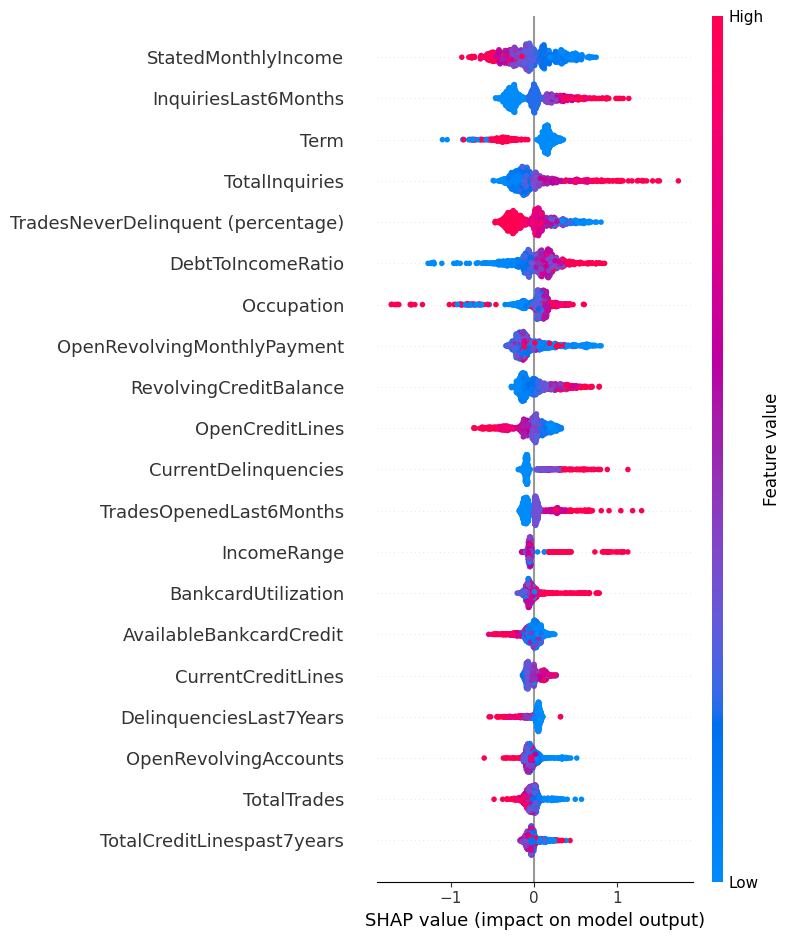

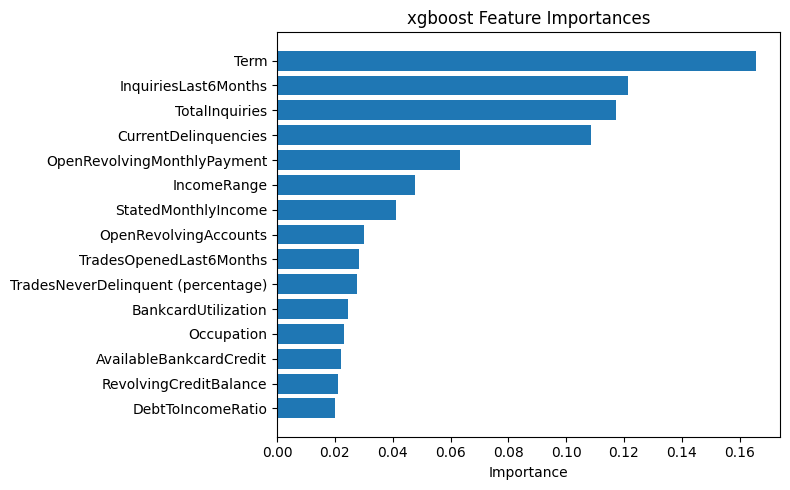

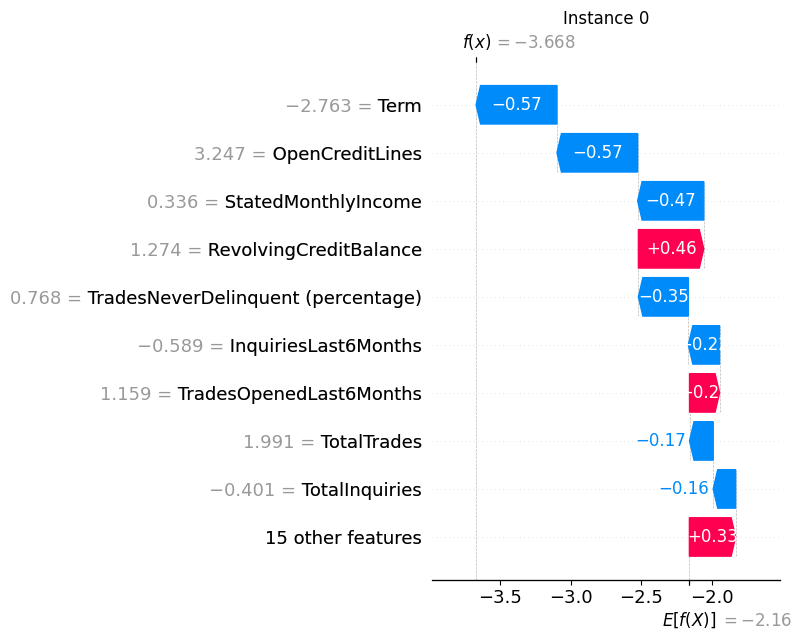

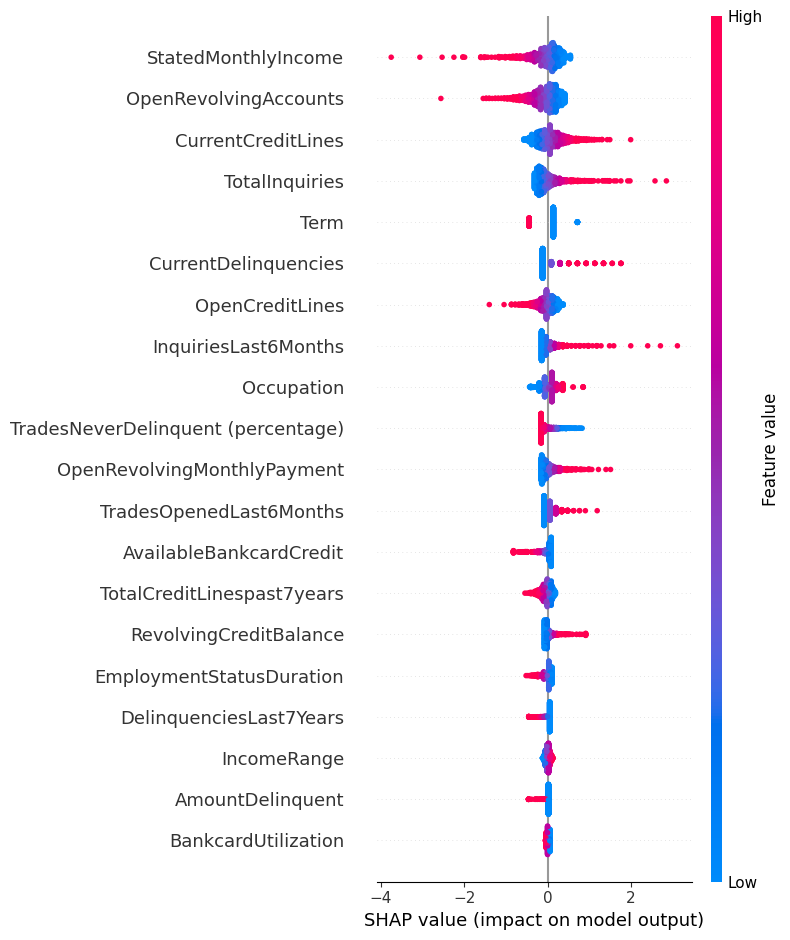

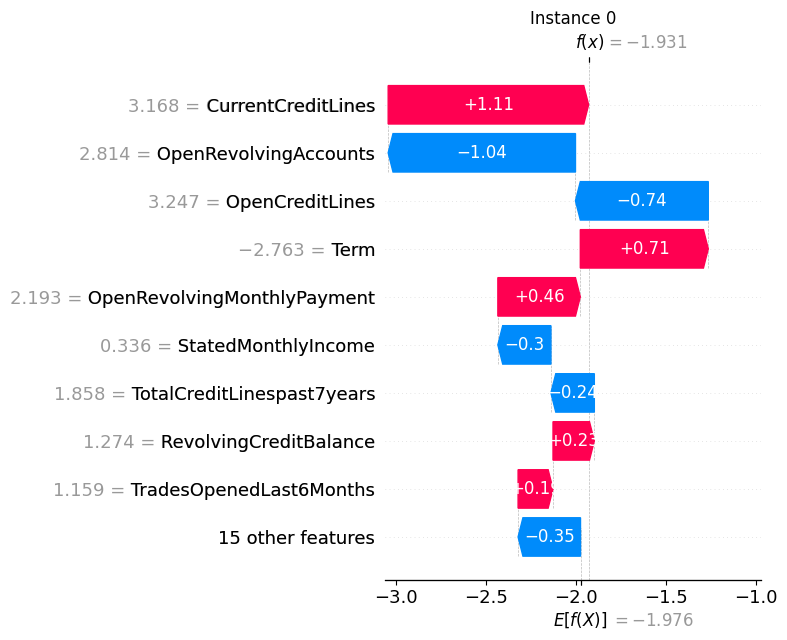

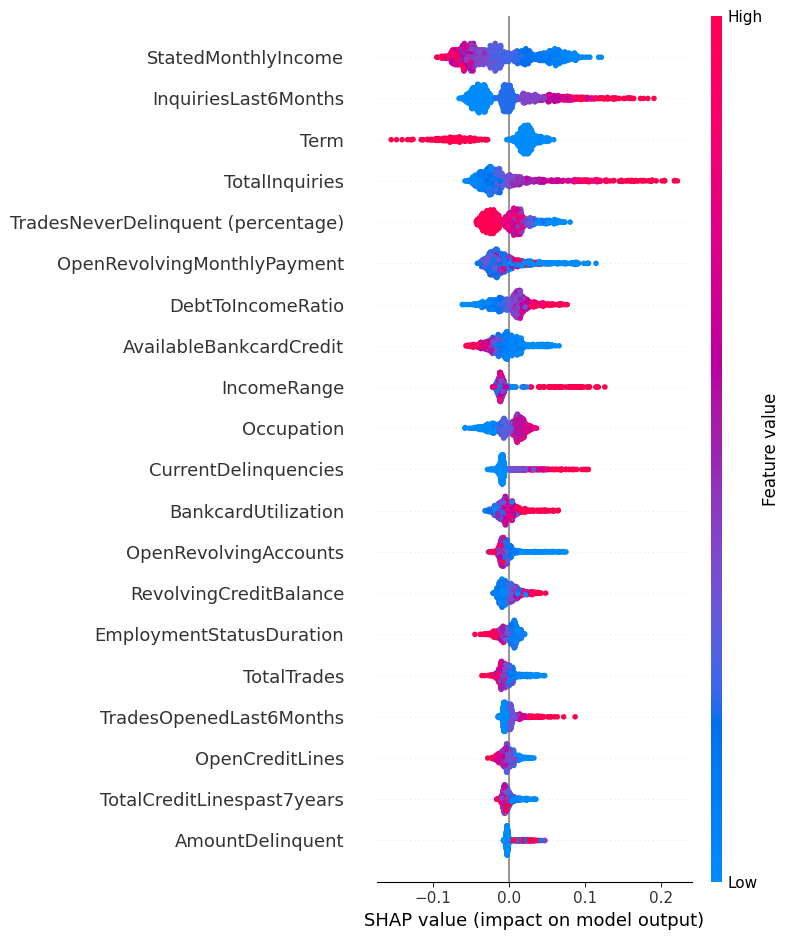

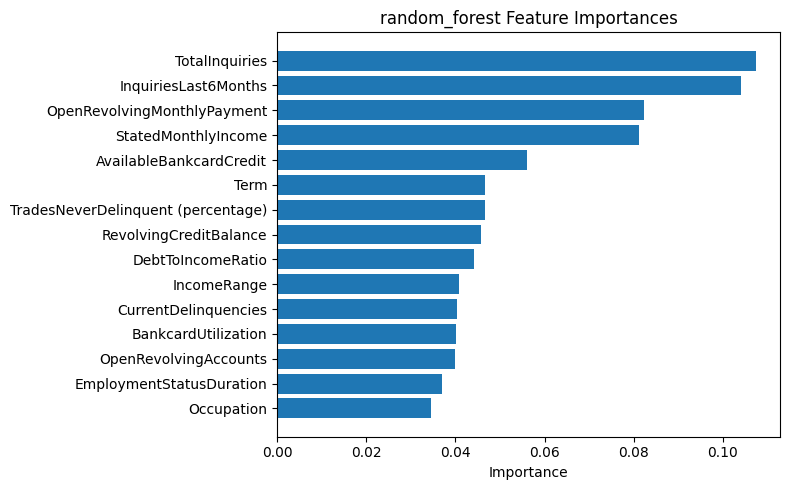

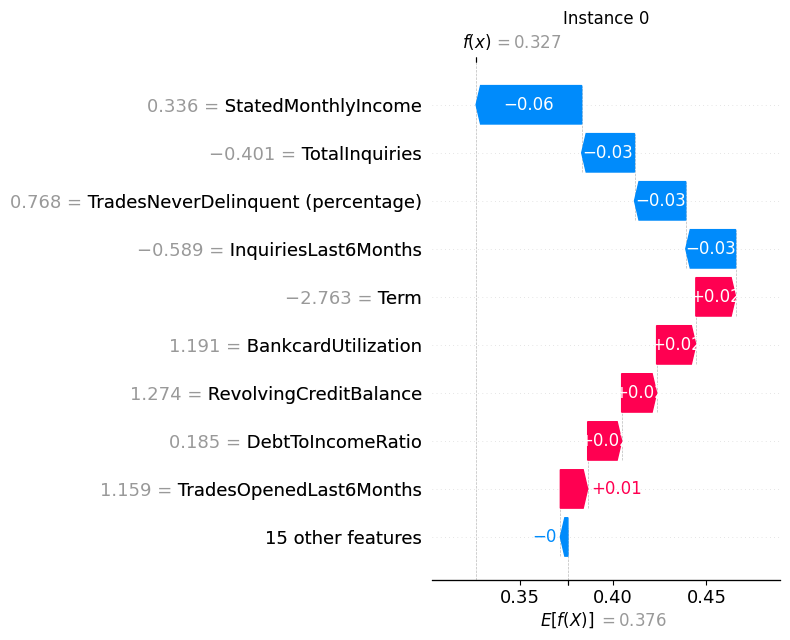

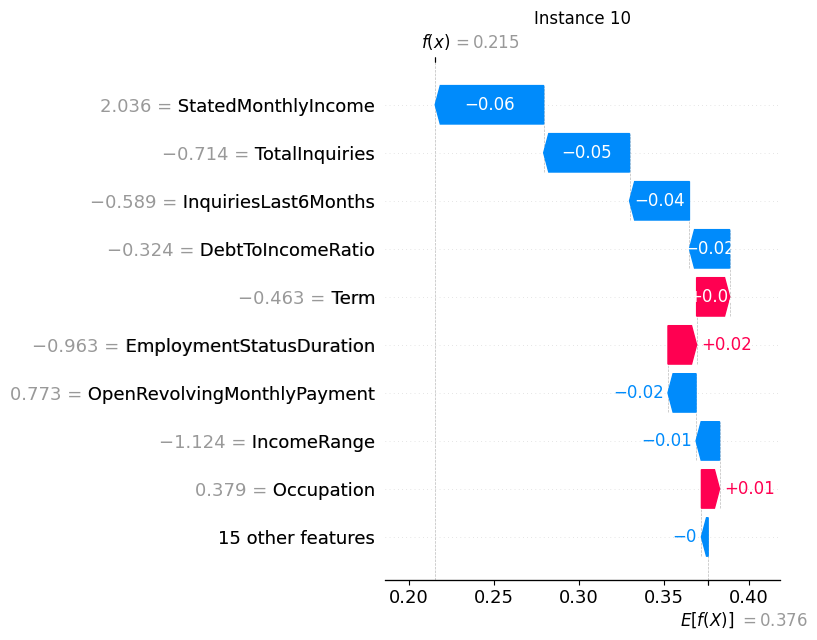

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
import joblib

from audit_tool.reporting import generate_report

X_train = pd.read_csv('../data/processed/prosperloan/X_train_lasso.csv')
y_train = pd.read_csv('../data/processed/prosperloan/y_train_lasso.csv').squeeze()
X_test  = pd.read_csv('../data/processed/prosperloan/X_test_lasso.csv')
y_test  = pd.read_csv('../data/processed/prosperloan/y_test_lasso.csv').squeeze()

models = {
    'xgboost'            : joblib.load('../models/prosperloan/xgboost.pkl'),
    'logistic_regression': joblib.load('../models/prosperloan/logisticregression.pkl'),
    'random_forest'      : joblib.load('../models/prosperloan/randomforest.pkl'),
}

for name, mdl in models.items():
    print(f"Generando informe para {name}…")
    generate_report(
        model_name=name,
        model=mdl,
        X_train=X_train,
        X_test =X_test,
        y_test =y_test,
        instance_indices=[0, 10] 
    )
print("Reports were correctly generated!")
